In [1]:
using ThreeBodyProblem
using DifferentialEquations
using Plots

In [2]:
μ₁ = 398600 # {km³/s²} gravitational parameter of Earth
μ₂ = 4902   # {km³/s²} gravitational parameter of the Moon
d = 384400  # {km} average distance between Earth and the Moon
p = [μ₁, μ₂, d];

In [4]:
Lpts = computeLpts(p)
L4 = Lpts[4]
L1 = computeL1(p)

3-element Vector{Float64}:
 321713.8570517506
      0.0
      0.0

In [6]:
R₁,R₂ = computeR1R2(p)
ωₛ = sqrt((μ₁ + μ₂)/d^3)

2.665310298373478e-6

In [7]:
N = 100
X = range(0,1.2*d,length=N)
Y = range(-d/2,d/2,length=N)

-192200.0:3882.8282828282827:192200.0

In [8]:
f(x,y) = begin
    -(x^2 + y^2)*ωₛ^2/2 - μ₁/sqrt((x+R₁)^2 + y^2) - μ₂/sqrt((x-R₂)^2 + y^2)
    # rv = [x; y; 0; 0; 0; 0]
    # findUeff(rv,p)
end

f (generic function with 1 method)

In [9]:
contour(X,Y,f,levels=200,fill=true)

In [10]:
Rₑ = 6378.0 # {km} radius of the Earth
Rₘ = 1738.0 # {km} radius of the Moon
h = 200.0   # {km} altitude of parking orbit

200.0

In [11]:
vᵢ = 10.92367104    # {km/s} injection velocity in rotating frame
ϕ = 47.70061087     # {°}

47.70061087

In [12]:
r₀ = [-R₁ - (Rₑ + 200)*cosd(ϕ); -(Rₑ + 200)*sind(ϕ); 0]
v₀ = vᵢ*[sind(ϕ); -cosd(ϕ); 0];
rv₀ = [r₀;v₀]

6-element Vector{Float64}:
 -9096.961145507787
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

In [13]:
tspan = (0.,86400*6.) # {sec} 6 day span

(0.0, 518400.0)

In [14]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,p)
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: automatic order switching interpolation
t: 110-element Vector{Float64}:
      0.0
      0.1980906955674927
      2.17899765124242
     21.988067207991687
     92.77548737077912
    196.70550680692864
    313.66493622131645
    448.2393711506835
    597.2054620073549
    763.4105644878707
    948.2719029353584
   1155.811732189169
   1390.2111998629775
      ⋮
 502204.5225481493
 502776.46720414114
 503450.86268056574
 504247.17984168907
 505193.9763025849
 506321.74903279514
 507669.1114874278
 509281.41010562645
 511214.1113189282
 513532.78392863704
 516292.6302608812
 518400.0
u: 110-element Vector{Vector{Float64}}:
 [-9096.961145507787, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]
 [-9095.360537973598, -4866.796709407592, 0.0, 8.080785257845982, -7.350339812191332, 0.0]
 [-9079.341186525837, -4881.34374796782, 0.0, 8.092961893716812, -7.336904230035766, 0.0]
 [-8917.838222786235, -5025.335334766077, 0.0, 8.212236092081602, -7.

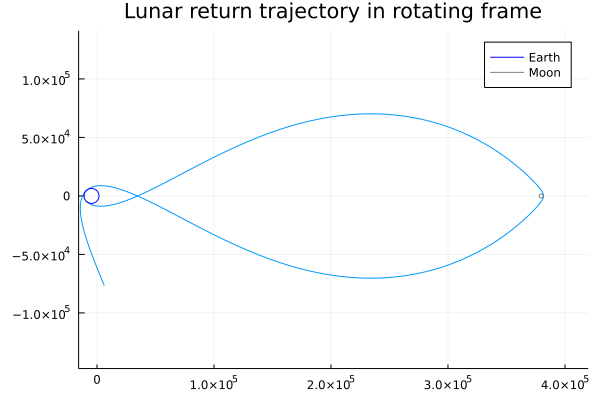

In [17]:
plot(sol,vars=(1,2),title="Lunar return trajectory in rotating frame",label="",aspect_ratio=:equal)
plot!(circle(Rₑ,[-R₁;0]),color="blue",label="Earth")
plot!(circle(Rₘ,[R₂;0]),color="gray",label="Moon")

In [26]:
rv_inert = [rot2inert(sol.u[i],sol.t[i],p) for i = 1:length(sol)]

110-element Vector{Vector{Float64}}:
 [-9096.961145507787, -4865.340542620438, 0.0, 4873.420107774765, -9104.312826669748, 0.0]
 [-9095.35796843424, -4866.8015115132575, 0.0, 4874.882300651884, -9102.708303979993, 0.0]
 [-9079.312836968811, -4881.396478019612, 0.0, 4889.489482523767, -9086.64969419719, 0.0]
 [-8917.543697584326, -5025.857956240877, 0.0, 5034.070614298476, -8924.74361664785, 0.0]
 [-8321.095209216839, -5519.073471801178, 0.0, 5527.673683990124, -8327.777822441034, 0.0]
 [-7401.244234260855, -6173.930407316675, 0.0, 6182.974637490338, -7407.114510564773, 0.0]
 [-6321.08153360686, -6808.006345286512, 0.0, 6817.366505092199, -6326.019370400106, 0.0]
 [-5046.633014778511, -7404.857565509402, 0.0, 7414.365180917472, -5050.549766729106, 0.0]
 [-3628.187194129709, -7913.533243097198, 0.0, 7922.9992102615815, -3631.1026323972274, 0.0]
 [-2066.7661669501877, -8319.475979070194, 0.0, 8328.735085101027, -2068.7536778816784, 0.0]
 [-380.45254102357103, -8609.10956401208, 0.0, 8618.

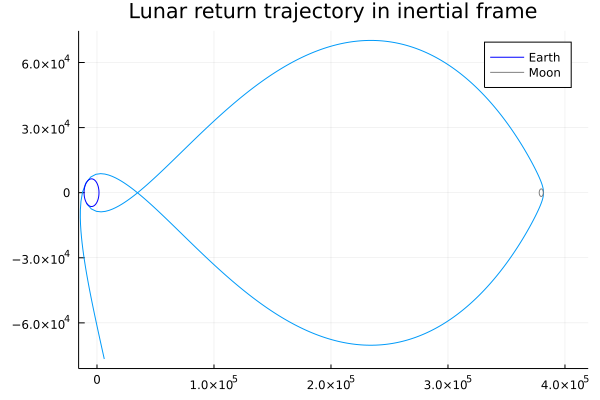

In [28]:
plot(rv_inert,vars=(1,2),title="Lunar return trajectory in inertial frame",label="")
plot!(circle(Rₑ,[-R₁;0]),color="blue",label="Earth")
plot!(circle(Rₘ,[R₂;0]),color="gray",label="Moon")

6-element Vector{Float64}:
 -9096.961145507787
 -4865.340542620438
     0.0
  4873.420107774765
 -9104.312826669748
     0.0

In [17]:
S2I!(rv₀,0,p)
prob = ODEProblem(CR3BPinert!,rv₀,tspan,p)
sol = solve(prob,reltol=1e-6)
plot(sol,vars=(1,2),title="Lunar return trajectory in inertial frame",label="")
# plot_circle(Rₑ,[-R₁*cos(ωₛ*tₚ);],color="blue",label="Earth")
# plot_circle(Rₘ,[R₂;0],color="gray",label="Moon")

UndefVarError: UndefVarError: S2I! not defined